In [455]:
import csv
from pathlib import Path
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSVs
## Ours

In [456]:
csv_path = Path("../data/demos/irl-stream-long-30fps-ours-detection-only.csv")
# csv_path = Path("../data/demos/irl-stream-long-30fps-ours-detection-only-laptop-battery.csv")
df = pd.read_csv(csv_path, sep=",", quotechar='"', engine='python')
df["frame_num"] = df["frame_num"].astype(int)
df["time_elapsed"] = df["time_elapsed"].astype(float)
df['bboxes'] = df['bboxes'].apply(ast.literal_eval)
df["fps"] = 1000 / df["time_elapsed"]
df["s"] = df["frame_num"] / 30
df

,frame_num,time_elapsed,bboxes,fps,s
0,0,42.573826,"[[0.2378862202167511, 0.12452264875173569, 0.4...",23.488610,0.000000
1,1,7.435264,"[[0.22895082831382751, 0.13420894742012024, 0....",134.494214,0.033333
2,2,5.736448,"[[0.2133309543132782, 0.14892908930778503, 0.4...",174.323908,0.066667
3,3,6.392832,"[[0.20853662490844727, 0.1533174067735672, 0.3...",156.425201,0.100000
4,4,7.459680,"[[0.19676898419857025, 0.14957909286022186, 0....",134.054006,0.133333
...,...,...,...,...,...
10795,10795,6.629376,"[[0.324215829372406, 0.2788046598434448, 0.380...",150.843761,359.833333
10796,10796,5.556224,"[[0.3275161385536194, 0.28004831075668335, 0.3...",179.978349,359.866667
10797,10797,5.702656,"[[0.3307044506072998, 0.2773936688899994, 0.38...",175.356893,359.900000
10798,10798,5.919744,"[[0.3325771689414978, 0.27409833669662476, 0.3...",168.926223,359.933333


In [457]:
df_tracker = pd.read_csv("../data/demos/irl-stream-long-30fps-ours-tracker-only.csv", sep=",", quotechar='"', engine='python')
df_tracker["frame_num"] = df_tracker["frame_num"].astype(int)
df_tracker["time_elapsed"] = df_tracker["time_elapsed"].astype(float)
df_tracker['bboxes'] = df_tracker['bboxes'].apply(ast.literal_eval)
df_tracker["fps"] = 1000 / df_tracker["time_elapsed"]
df_tracker["s"] = df_tracker["frame_num"] / 30
df_tracker

,frame_num,time_elapsed,bboxes,fps,s
0,0,44.349442,"[[0.5562499761581421, 0.3765625059604645, 0.61...",22.548198,0.000000
1,1,8.669184,"[[0.5581797361373901, 0.38615599274635315, 0.6...",115.351114,0.033333
2,2,6.567936,"[[0.554633617401123, 0.3846684396266937, 0.612...",152.254834,0.066667
3,3,6.561792,"[[0.552940845489502, 0.3798730969429016, 0.606...",152.397396,0.100000
4,4,6.551552,"[[0.5532804131507874, 0.38006749749183655, 0.6...",152.635593,0.133333
...,...,...,...,...,...
10795,10795,4.659200,"[[0.7089212536811829, 0.3634576201438904, 0.75...",214.629112,359.833333
10796,10796,4.656128,"[[0.40416666865348816, 0.4859375059604645, 0.4...",214.770731,359.866667
10797,10797,6.764544,"[[0.40416666865348816, 0.4859375059604645, 0.4...",147.829624,359.900000
10798,10798,4.665344,"[[0.40416666865348816, 0.4859375059604645, 0.4...",214.346455,359.933333


## 'Ground Truth' - Tinaface

In [545]:
tina_csv_path = Path("../data/demos/irl-stream-long-30fps-tinaface.csv")
df_tina = pd.read_csv(tina_csv_path, sep=",", quotechar='"', engine='python')
df_tina["frame_num"] = df_tina["frame_num"].astype(int)
df_tina["time_elapsed"] = df_tina["time_elapsed"].astype(float)
df_tina['bboxes'] = df_tina['bboxes'].apply(ast.literal_eval)
df_tina["fps"] = 1000 / df_tina["time_elapsed"]
df_tina["s"] = df_tina["frame_num"] / 30
df_tina

,frame_num,time_elapsed,bboxes,fps,s
0,0,793.615356,"[[0.2613637447357178, 0.1467597782611847, 0.41...",1.260056,0.000000
1,1,609.464233,"[[0.2500605285167694, 0.15720407664775848, 0.4...",1.640785,0.033333
2,2,608.793091,"[[0.23576350510120392, 0.16982068121433258, 0....",1.642594,0.066667
3,3,611.547180,"[[0.22362782061100006, 0.17400027811527252, 0....",1.635197,0.100000
4,4,613.920532,"[[0.212729349732399, 0.17810535430908203, 0.38...",1.628875,0.133333
...,...,...,...,...,...
10795,10795,972.909973,"[[0.3283191919326782, 0.2795014977455139, 0.36...",1.027844,359.833333
10796,10796,973.042175,"[[0.33159634470939636, 0.2785113751888275, 0.3...",1.027705,359.866667
10797,10797,973.242432,"[[0.3356862962245941, 0.27738896012306213, 0.3...",1.027493,359.900000
10798,10798,973.338745,"[[0.3385699987411499, 0.2769674062728882, 0.37...",1.027392,359.933333


# Processing BBOXES

In [546]:
# Original code from https://gist.github.com/AruniRC/c629c2df0e68e23aff7dcaeef87c72d4
from __future__ import division
import scipy.optimize
import numpy as np


def bbox_iou(boxA, boxB):
    # Determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interW = xB - xA  # Removed +1 here
    interH = yB - yA  # Removed +1 here

    # Correction: reject non-overlapping boxes
    if interW <= 0 or interH <= 0:
        return 0.0  # Changed from -1.0 to 0.0 to indicate no overlap

    interArea = interW * interH
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])  # Removed +1 here
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])  # Removed +1 here
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou


def match_bboxes(bbox_gt, bbox_pred, IOU_THRESH=0.5):
    """
    Adjusted comments and code to align with fractional input.
    """
    n_true = bbox_gt.shape[0]
    n_pred = bbox_pred.shape[0]
    MAX_DIST = 1.0  # Max distance in fractional terms
    MIN_IOU = 0.0  # Minimum IOU for non-overlapping boxes

    # NUM_GT x NUM_PRED
    iou_matrix = np.zeros((n_true, n_pred))
    for i in range(n_true):
        for j in range(n_pred):
            iou_matrix[i, j] = bbox_iou(bbox_gt[i, :], bbox_pred[j, :])

    if n_pred > n_true:
        # there are more predictions than ground-truth - add dummy rows
        diff = n_pred - n_true
        iou_matrix = np.concatenate(
            (iou_matrix, np.full((diff, n_pred), MIN_IOU)), axis=0
        )

    if n_true > n_pred:
        # more ground-truth than predictions - add dummy columns
        diff = n_true - n_pred
        iou_matrix = np.concatenate(
            (iou_matrix, np.full((n_true, diff), MIN_IOU)), axis=1
        )

    # call the Hungarian matching
    idxs_true, idxs_pred = scipy.optimize.linear_sum_assignment(1 - iou_matrix)

    if (not idxs_true.size) or (not idxs_pred.size):
        ious = np.array([])
    else:
        ious = iou_matrix[idxs_true, idxs_pred]

    # remove dummy assignments
    sel_pred = idxs_pred < n_pred
    idx_pred_actual = idxs_pred[sel_pred]
    idx_gt_actual = idxs_true[sel_pred]
    ious_actual = iou_matrix[idx_gt_actual, idx_pred_actual]
    sel_valid = ious_actual > IOU_THRESH
    label = sel_valid.astype(int)

    return (
        idx_gt_actual[sel_valid],
        idx_pred_actual[sel_valid],
        ious_actual[sel_valid],
        label,
    )


In [547]:
# OLD:
# Original code from https://gist.github.com/AruniRC/c629c2df0e68e23aff7dcaeef87c72d4
# from __future__ import division
# import scipy.optimize
# import numpy as np

# def bbox_iou(boxA, boxB):
#   # https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
#   # ^^ corrected.
    
#   # Determine the (x, y)-coordinates of the intersection rectangle
#   xA = max(boxA[0], boxB[0])
#   yA = max(boxA[1], boxB[1])
#   xB = min(boxA[2], boxB[2])
#   yB = min(boxA[3], boxB[3])

#   interW = xB - xA + 1
#   interH = yB - yA + 1

#   # Correction: reject non-overlapping boxes
#   if interW <=0 or interH <=0 :
#     return -1.0

#   interArea = interW * interH
#   boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
#   boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
#   iou = interArea / float(boxAArea + boxBArea - interArea)
#   return iou



# def match_bboxes(bbox_gt, bbox_pred, IOU_THRESH=0.5):
#     '''
#     Given sets of true and predicted bounding-boxes,
#     determine the best possible match.
#     Parameters
#     ----------
#     bbox_gt, bbox_pred : N1x4 and N2x4 np array of bboxes [x1,y1,x2,y2]. 
#       The number of bboxes, N1 and N2, need not be the same.
    
#     Returns
#     -------
#     (idxs_true, idxs_pred, ious, labels)
#         idxs_true, idxs_pred : indices into gt and pred for matches
#         ious : corresponding IOU value of each match
#         labels: vector of 0/1 values for the list of detections
#     '''
#     n_true = bbox_gt.shape[0]
#     n_pred = bbox_pred.shape[0]
#     MAX_DIST = 1.0
#     MIN_IOU = 0.0

#     # NUM_GT x NUM_PRED
#     iou_matrix = np.zeros((n_true, n_pred))
#     for i in range(n_true):
#         for j in range(n_pred):
#             iou_matrix[i, j] = bbox_iou(bbox_gt[i,:], bbox_pred[j,:])

#     if n_pred > n_true:
#       # there are more predictions than ground-truth - add dummy rows
#       diff = n_pred - n_true
#       iou_matrix = np.concatenate( (iou_matrix, 
#                                     np.full((diff, n_pred), MIN_IOU)), 
#                                   axis=0)

#     if n_true > n_pred:
#       # more ground-truth than predictions - add dummy columns
#       diff = n_true - n_pred
#       iou_matrix = np.concatenate( (iou_matrix, 
#                                     np.full((n_true, diff), MIN_IOU)), 
#                                   axis=1)

#     # call the Hungarian matching
#     idxs_true, idxs_pred = scipy.optimize.linear_sum_assignment(1 - iou_matrix)

#     if (not idxs_true.size) or (not idxs_pred.size):
#         ious = np.array([])
#     else:
#         ious = iou_matrix[idxs_true, idxs_pred]

#     # remove dummy assignments
#     sel_pred = idxs_pred<n_pred
#     idx_pred_actual = idxs_pred[sel_pred] 
#     idx_gt_actual = idxs_true[sel_pred]
#     ious_actual = iou_matrix[idx_gt_actual, idx_pred_actual]
#     sel_valid = (ious_actual > IOU_THRESH)
#     label = sel_valid.astype(int)

#     return idx_gt_actual[sel_valid], idx_pred_actual[sel_valid], ious_actual[sel_valid], label 

In [549]:
def make_results_df(df_ours, df_theirs):
    results = []
    missed_per_frame = []
    
    for (_, row_pred), (_, row_true) in zip(df_ours.iterrows(), df_theirs.iterrows()):
        frame_pred = row_pred["frame_num"]
        bboxes_pred = row_pred["bboxes"]
        frame_true = row_true["frame_num"]
        bboxes_true = row_true["bboxes"]
        assert frame_pred == frame_true, f"Frame number is different at {frame_pred, frame_true}"
        bboxes_pred, bboxes_true = np.array(bboxes_pred), np.array(bboxes_true)
    
        missed_bboxes = bboxes_pred.shape[0] - bboxes_true.shape[0]
    
        matches = match_bboxes(bboxes_pred, bboxes_true, IOU_THRESH=0)
        ious = matches[2]
        res = []
        for iou, label in zip(ious, labels):
            res.append((frame_pred, iou, False))
    
        # count missed bboxes as 0 iou
        res.extend(abs(missed_bboxes) * [(frame_pred, 0, True)])
        results.extend(res)
    
        missed_per_frame.append((frame_pred, missed_bboxes))

    return results, missed_per_frame

In [550]:
results, missed_per_frame = make_results_df(df, df_tina)

missed_per_frame_df = pd.DataFrame.from_records(missed_per_frame)
missed_per_frame_df.columns = ["frame_num", "missed"]
missed_per_frame_df["s"] = missed_per_frame_df["frame_num"] / 30


df_results = pd.DataFrame.from_records(results)
df_results.columns = ["frame_num", "iou", "missed"]
IOU_THRESH = 0.5
df_results["correct"] = df_results["iou"] >= IOU_THRESH
df_results["s"] = df_results["frame_num"] / 30
df_results

,frame_num,iou,missed,correct,s
0,0,0.774424,False,True,0.000000
1,0,0.600598,False,True,0.000000
2,1,0.788328,False,True,0.033333
3,1,0.606663,False,True,0.033333
4,2,0.787037,False,True,0.066667
...,...,...,...,...,...
29681,10798,0.546705,False,True,359.933333
29682,10798,0.524823,False,True,359.933333
29683,10798,0.000000,True,False,359.933333
29684,10799,0.595818,False,True,359.966667


In [551]:
results_tracker, missed_per_frame_tracker = make_results_df(df_tracker, df_tina)

missed_per_frame_df_tracker = pd.DataFrame.from_records(missed_per_frame_tracker)
missed_per_frame_df_tracker.columns = ["frame_num", "missed"]
missed_per_frame_df_tracker["s"] = missed_per_frame_df_tracker["frame_num"] / 30

df_results_tracker = pd.DataFrame.from_records(results_tracker)
df_results_tracker.columns = ["frame_num", "iou", "missed"]
IOU_THRESH = 0.5
df_results_tracker["correct"] = df_results_tracker["iou"] >= IOU_THRESH
df_results_tracker["s"] = df_results_tracker["frame_num"] / 30
df_results_tracker

,frame_num,iou,missed,correct,s
0,0,0.598110,False,True,0.000000
1,0,0.770551,False,True,0.000000
2,1,0.605792,False,True,0.033333
3,1,0.779840,False,True,0.033333
4,2,0.595781,False,True,0.066667
...,...,...,...,...,...
29934,10798,0.534317,False,True,359.933333
29935,10798,0.564089,False,True,359.933333
29936,10799,0.541667,False,True,359.966667
29937,10799,0.581664,False,True,359.966667


In [552]:
print(df_results[df_results["missed"] == False]["correct"].mean(), df_results["correct"].mean(), df_results["missed"].sum() / len(df_results))

0.9633994026608743 0.5976217745738732 0.3796739203665027


In [496]:
print(df["time_elapsed"].mean())
print(df_tracker["time_elapsed"].mean())
print(df_tina["time_elapsed"].mean())

6.803620907995436
5.90534542368518
1124.246199826841


# Graphs

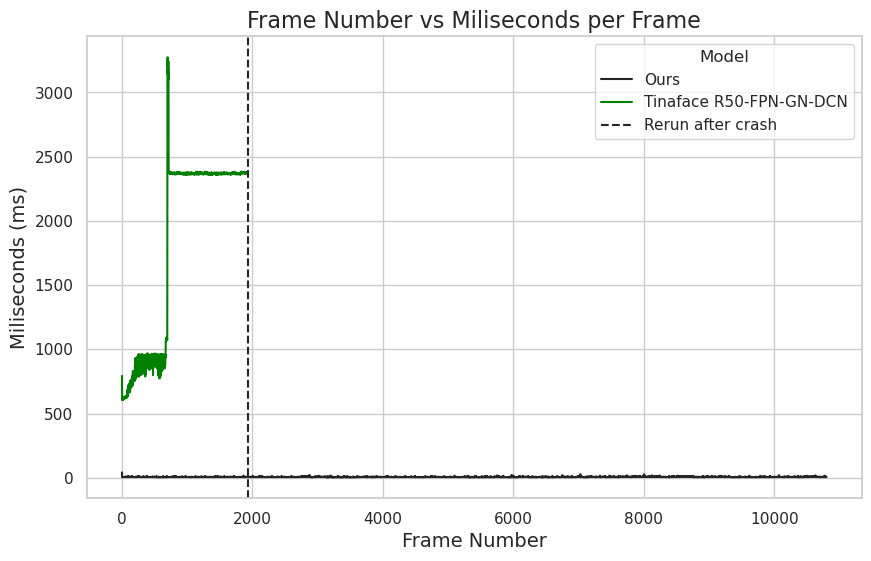

In [427]:
sns.set(style="whitegrid", palette="gray")

plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=df, x='frame_num', y='time_elapsed', label='Ours')
sns.lineplot(data=df_tina, x='frame_num', y='time_elapsed', label='Tinaface R50-FPN-GN-DCN', ax=ax, color="green")

rerun_at = 1928
ax.axvline(rerun_at, linestyle='--', label="Rerun after crash")

plt.title('Frame Number vs Miliseconds per Frame', fontsize=16)
plt.xlabel('Frame Number', fontsize=14)
plt.ylabel('Miliseconds (ms)', fontsize=14)

plt.legend(title='Model')

plt.savefig("MS per frame by Frame Number.png")
plt.show()

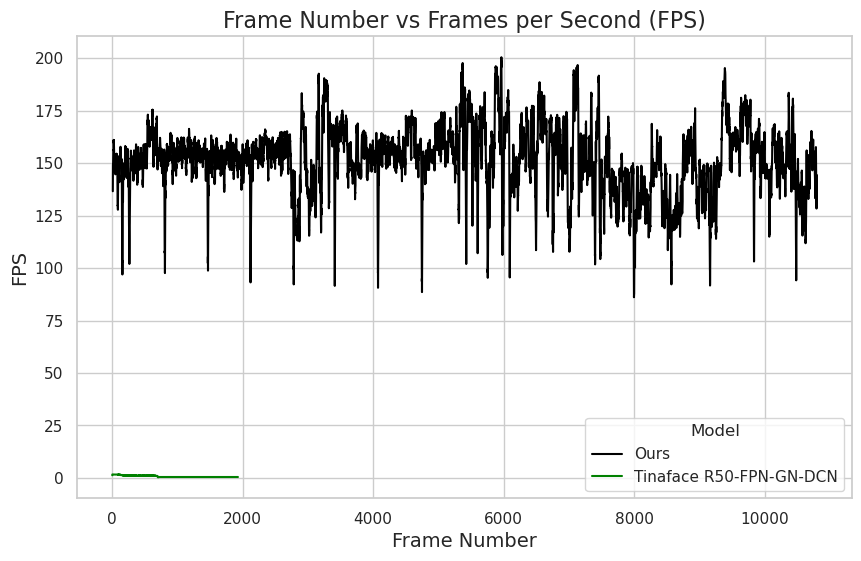

In [426]:
sns.set(style="whitegrid", palette="gray")

plt.figure(figsize=(10, 6))

ax = sns.lineplot(x=df['frame_num'], y=df['fps'].rolling(window=10).mean(), label='Ours', color="black")
sns.lineplot(data=df_tina, x='frame_num', y='fps', label='Tinaface R50-FPN-GN-DCN', ax=ax, color="green")

plt.title('Frame Number vs Frames per Second (FPS)', fontsize=16)
plt.xlabel('Frame Number', fontsize=14)
plt.ylabel('FPS', fontsize=14)

plt.legend(title='Model')

plt.savefig("Frame Number by Time Elapsed.png")
plt.show()

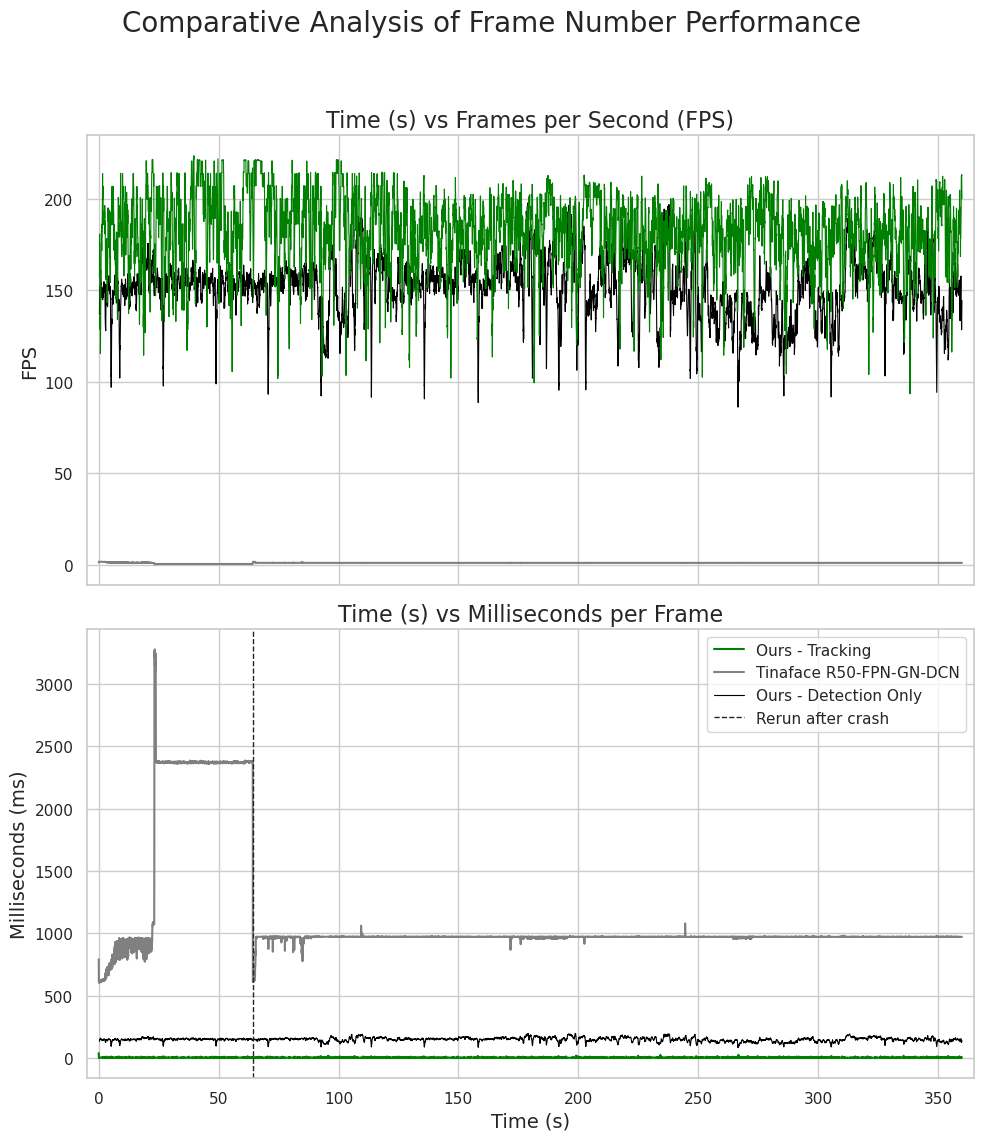

In [582]:
sns.set(style="whitegrid", palette="gray")

# Creating a figure with two subplots (two rows, one column) sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Graph 1: Frame Number vs Frames per Second (FPS)
sns.lineplot(x=df['s'], y=df['fps'].rolling(window=10).mean(), ax=ax1, label='Ours - Detection Only', color="black", linewidth=0.8)
sns.lineplot(x=df_tracker['s'], y=df_tracker['fps'].rolling(window=10).mean(), ax=ax1, label='Ours - Tracking', color="green", linewidth=0.8)
sns.lineplot(data=df_tina, x='s', y='fps', ax=ax1, label='Tinaface R50-FPN-GN-DCN', color="grey")

ax1.set_title('Time (s) vs Frames per Second (FPS)', fontsize=16)
ax1.set_ylabel('FPS', fontsize=14)
ax1.get_legend().remove()

# Graph 2: Frame Number vs Milliseconds per Frame
sns.lineplot(data=df, x='s', y='time_elapsed', ax=ax2, label='Ours - Tracking', color="green")
sns.lineplot(data=df_tina, x='s', y='time_elapsed', ax=ax2, label='Tinaface R50-FPN-GN-DCN', color="grey")
sns.lineplot(x=df['s'], y=df['fps'].rolling(window=10).mean(), ax=ax2, label='Ours - Detection Only', color="black", linewidth=0.8)

# frame num / 30
rerun_at = 1928 / 30
ax2.axvline(rerun_at, linestyle='--', label="Rerun after crash", linewidth=1)

ax2.set_title('Time (s) vs Milliseconds per Frame', fontsize=16)
ax2.set_xlabel('Time (s)', fontsize=14)
ax2.set_ylabel('Milliseconds (ms)', fontsize=14)

# Adding a super title for the figure
fig.suptitle('Comparative Analysis of Frame Number Performance', fontsize=20)

# Adding one legend for the entire figure
# handles, labels = ax2.get_legend_handles_labels()
# fig.legend(handles, labels, title='Model', loc='upper right')

ax2.legend()
ax2.set_xlim([-5, 365])

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("FPS MS combined.png")
plt.show()

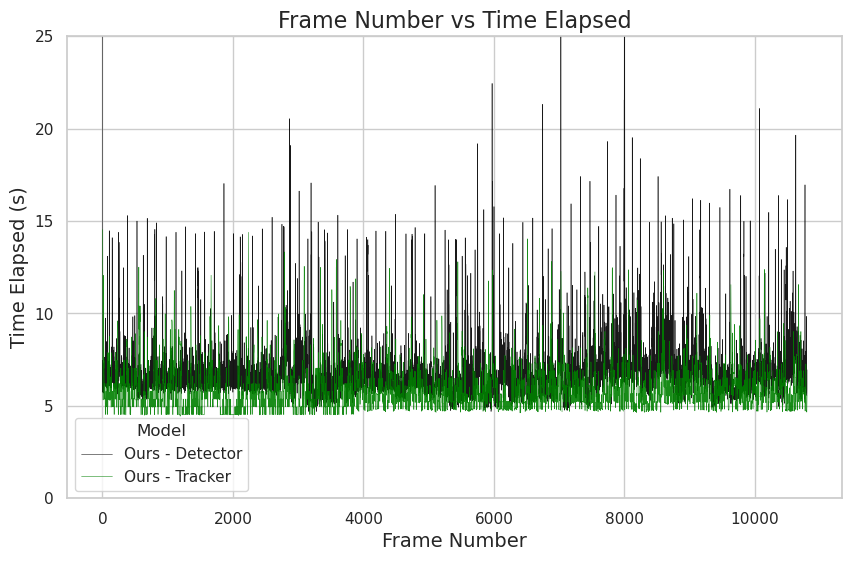

In [500]:
sns.set(style="whitegrid", palette="gray")

plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=df, x='frame_num', y='time_elapsed', label='Ours - Detector', color="black", alpha=0.9, linewidth=0.4)
sns.lineplot(x=df_tracker['frame_num'], y=df_tracker['time_elapsed'].rolling(window=5).mean(), label='Ours - Tracker', color='green', ax=ax, alpha=0.9, linewidth=0.4)

plt.ylim([0, 25])

plt.title('Frame Number vs Time Elapsed', fontsize=16)
plt.xlabel('Frame Number', fontsize=14)
plt.ylabel('Time Elapsed (s)', fontsize=14)

plt.legend(title='Model')

plt.savefig("Time Elapsed Tracker vs Detector By Frame Number.png")
plt.show()

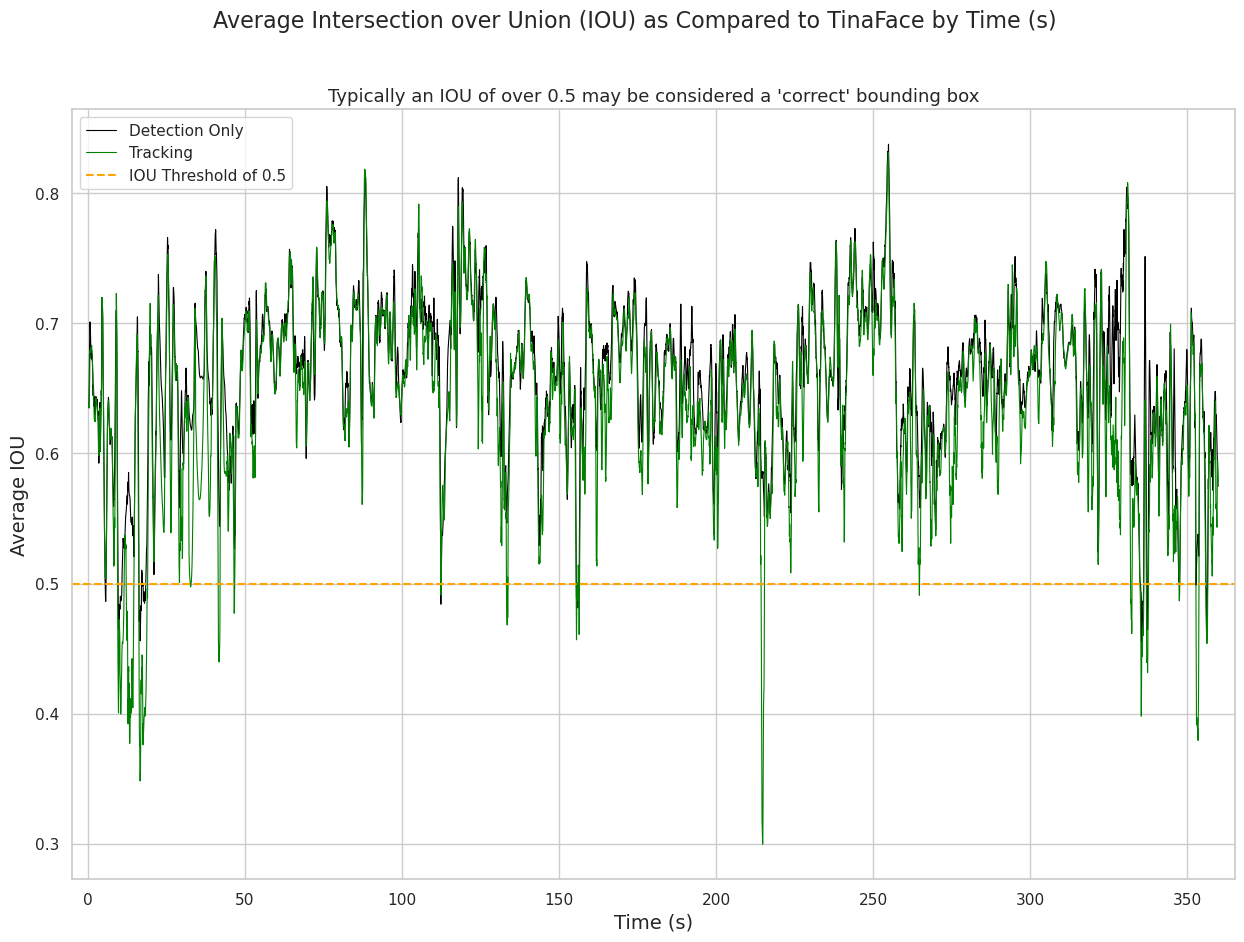

In [583]:
sns.set(style="whitegrid", palette="gray")

plt.figure(figsize=(15, 10))

filtered_data = df_results[df_results["missed"] == False].groupby("frame_num").mean().rolling(window=15).mean()
ax = sns.lineplot(data=filtered_data, x='s', y='iou', label="Detection Only", color="black", linewidth=0.8)

filtered_data = df_results_tracker[df_results_tracker["missed"] == False].groupby("frame_num").mean().rolling(window=15).mean()
ax = sns.lineplot(data=filtered_data, x='s', y='iou', label="Tracking", color="green", linewidth=0.8)
ax.set_xlim([-5, 365])

plt.hlines(0.5, label="IOU Threshold of 0.5", xmin=-5, xmax=df_results["s"].iloc[-1] + 5, linestyle="--", color="orange")

plt.suptitle('Average Intersection over Union (IOU) as Compared to TinaFace by Time (s)', fontsize=16)
plt.title("Typically an IOU of over 0.5 may be considered a 'correct' bounding box", fontsize=13)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Average IOU', fontsize=14)

plt.legend()

plt.savefig("Average IOU by time.png")
plt.show()

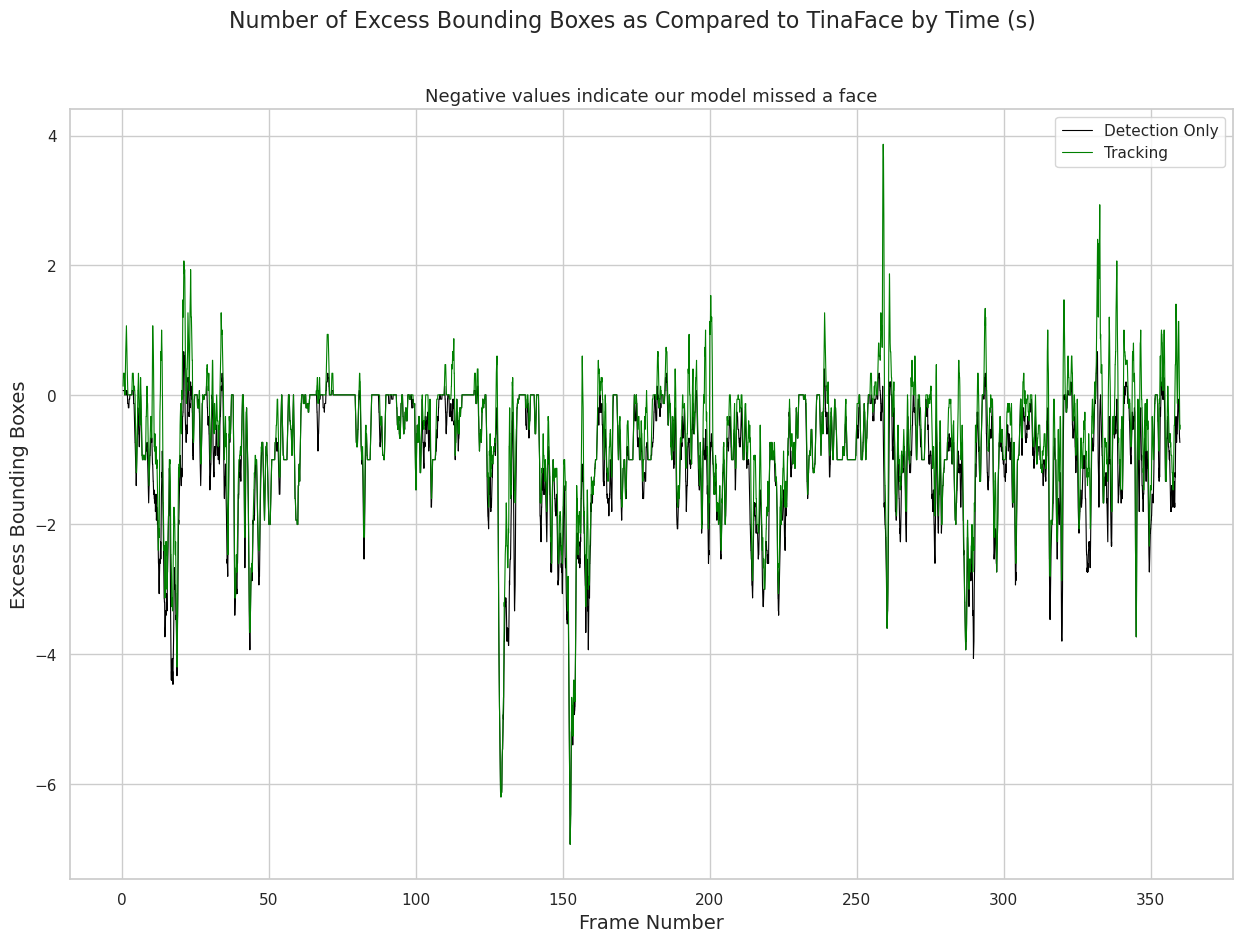

In [584]:
sns.set(style="whitegrid", palette="gray")

plt.figure(figsize=(15, 10))

ax = sns.lineplot(x=missed_per_frame_df["s"], y=missed_per_frame_df["missed"].rolling(window=15).mean(), label="Detection Only", color="black", linewidth=0.8)
ax = sns.lineplot(x=missed_per_frame_df_tracker["s"], y=missed_per_frame_df_tracker["missed"].rolling(window=15).mean(), label="Tracking", color="green", linewidth=0.8)


plt.suptitle('Number of Excess Bounding Boxes as Compared to TinaFace by Time (s)', fontsize=16)
plt.title('Negative values indicate our model missed a face', fontsize=13)

plt.xlabel('Frame Number', fontsize=14)
plt.ylabel('Excess Bounding Boxes', fontsize=14)

plt.savefig("Excess BBoxes by Frame Number.png")

plt.show()

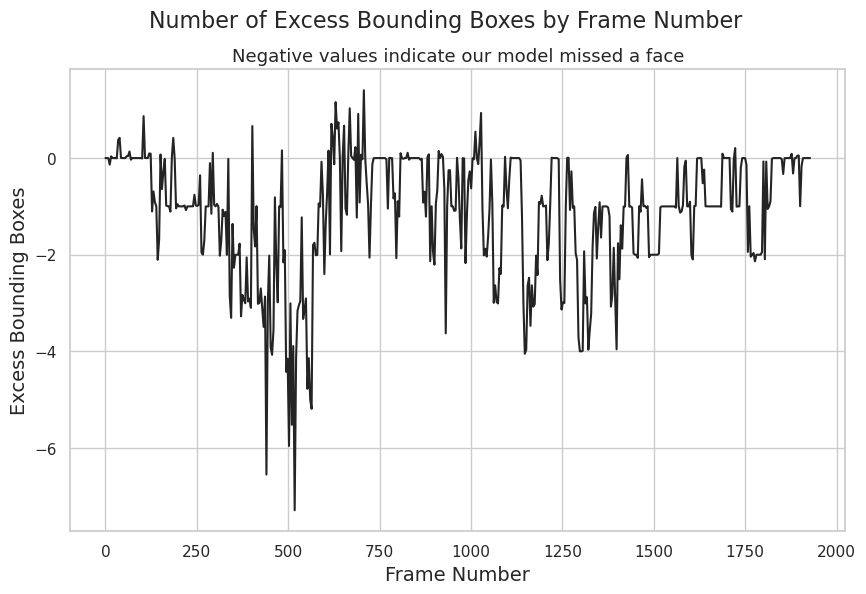

In [373]:
from scipy.interpolate import make_interp_spline

x = missed_per_frame[:, 0]
y = missed_per_frame[:, 1]
 
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)



sns.set(style="whitegrid", palette="gray")

plt.figure(figsize=(10, 6))
sns.lineplot(x=X_, y=Y_)

plt.suptitle('Number of Excess Bounding Boxes by Frame Number', fontsize=16)
plt.title('Negative values indicate our model missed a face', fontsize=13)

plt.xlabel('Frame Number', fontsize=14)
plt.ylabel('Excess Bounding Boxes', fontsize=14)

plt.savefig("Excess BBoxes by Frame Number old.png")

plt.show()